# -----------------------------------Movie Review Analysis-------------------------------------------

Create a sentiment analysis model which will take review of the viewer as a input and output the sentiment associated with it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
X = df.drop(columns = ['sentiment'], axis = 1)
Y = df['sentiment']

In [5]:
X.shape, Y.shape

((50000, 1), (50000,))

In [6]:
X.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


# Create a NLP Pipeline to Clean the Reviews Data

* Tokenize
* Remove Stopwords
* Perform Stemming
* Write Clean data to output file

In [8]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [9]:
# Initialize objects
tokenizer = RegexpTokenizer(r'\w+')
en_stopword = set(stopwords.words("english"))
ps = PorterStemmer()

## Cleaned Review

In [11]:
def getStemmedReview(review):
    review = review.lower()
    review = review.replace("<br /><br", " ")
    tokens = tokenizer.tokenize(review)
    new_tokens = [token for token in tokens if token not in en_stopword]
    
    stemmed_tokens = [ps.stem(token) for token in new_tokens]
    
    cleaned_review = " ".join(stemmed_tokens)
    
    return cleaned_review

In [32]:
X_clean = []

for i in range(len(X['review'])):
    cleaned_reviews = getStemmedReview(X['review'][i])
    X_clean.append(cleaned_reviews)

In [34]:
X_clean[10]

'phil alien one quirki film humour base around odd everyth rather actual punchlin first odd pretti funni movi progress find joke odd funni anymor low budget film that never problem pretti interest charact eventu lost interest imagin film would appeal stoner current partak someth similar better tri brother anoth planet'

In [20]:
Y = Y.map({'positive':1,
            'negative':0})

Y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

# Split into Train and Test

In [21]:
from sklearn.model_selection import train_test_split as tts

In [45]:
x_train, x_test, y_train, y_test = tts(X_clean, Y, train_size=0.8)


In [46]:
x_test

['easi movi tri suspens wind mere uninterest happen quit often dark harbor uninterest poorli done scene scene tack otherwis overdon premis troubl coupl pick troubl stranger find troubl movi build tension build stori dark harbor keep ad stori never build upon hope like movi suspens would final explod never also charact continu scene scene may act one way one scene act complet differ way anoth scene first think mere charact end realiz realli charact prop final twist final ten minut tri shock instead rather lame uninterest thing shock movi final end less nineti minut movi still feel way long one low budget gem like counterfeit watch break soon take home',
 'thoma inc alway knack bring simpl homespun stori life full flair italian film solid act particularli georg beban father silent child actor georg beban jr wonder set convey realist feel earli immigr tenement new york give 1915 film authent unusu featur vintag film begin modern day man georg beban modern cloth read stori italian immigr t

# Building Vocab & Vectorization

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
cv = CountVectorizer(ngram_range = (2,2))

In [67]:
x_vec = cv.fit_transform(x_train)

In [68]:
print(x_vec)

  (0, 1487272)	1
  (0, 386789)	1
  (0, 1489941)	1
  (0, 2076926)	1
  (0, 1287059)	1
  (0, 1916560)	1
  (0, 1148876)	1
  (0, 2148516)	1
  (0, 238648)	1
  (0, 118866)	1
  (0, 2165894)	1
  (0, 238979)	1
  (0, 727416)	1
  (0, 1374933)	1
  (0, 1897432)	1
  (0, 1233241)	1
  (0, 281390)	1
  (0, 724175)	1
  (0, 412916)	1
  (0, 1220027)	1
  (0, 1785400)	1
  (0, 517814)	1
  (0, 1470360)	1
  (0, 945868)	1
  (0, 1371618)	1
  :	:
  (39999, 1640099)	1
  (39999, 562948)	1
  (39999, 1950172)	1
  (39999, 790491)	1
  (39999, 847511)	1
  (39999, 1226400)	1
  (39999, 481021)	1
  (39999, 468259)	1
  (39999, 425710)	1
  (39999, 1707695)	1
  (39999, 1676460)	1
  (39999, 1523926)	1
  (39999, 479243)	1
  (39999, 1158952)	1
  (39999, 442600)	1
  (39999, 518385)	1
  (39999, 1365770)	1
  (39999, 1047085)	1
  (39999, 1411785)	1
  (39999, 1045728)	1
  (39999, 2066907)	1
  (39999, 868592)	1
  (39999, 344688)	1
  (39999, 2031386)	1
  (39999, 1734304)	1


In [69]:
# Vectorize of Test data
xt_vec = cv.transform(x_test)

In [70]:
print(xt_vec)

  (0, 35115)	1
  (0, 36341)	1
  (0, 45591)	1
  (0, 79122)	1
  (0, 104199)	1
  (0, 266824)	1
  (0, 268990)	1
  (0, 269027)	1
  (0, 269078)	1
  (0, 324253)	1
  (0, 324700)	1
  (0, 394539)	1
  (0, 415202)	1
  (0, 434574)	1
  (0, 473060)	2
  (0, 525175)	1
  (0, 554588)	1
  (0, 585469)	1
  (0, 612156)	1
  (0, 612797)	1
  (0, 711184)	1
  (0, 731926)	1
  (0, 731967)	1
  (0, 732793)	1
  (0, 732856)	1
  :	:
  (9999, 606956)	1
  (9999, 710009)	1
  (9999, 710878)	1
  (9999, 710940)	1
  (9999, 883344)	1
  (9999, 891868)	1
  (9999, 972436)	1
  (9999, 1100639)	1
  (9999, 1140697)	1
  (9999, 1161655)	1
  (9999, 1163267)	1
  (9999, 1163689)	1
  (9999, 1193380)	1
  (9999, 1282275)	1
  (9999, 1285956)	1
  (9999, 1366563)	1
  (9999, 1730680)	1
  (9999, 1812006)	1
  (9999, 1858027)	1
  (9999, 1858340)	1
  (9999, 1891893)	1
  (9999, 1974121)	1
  (9999, 2134582)	1
  (9999, 2189015)	1
  (9999, 2191424)	1


# Model creat and Prediction

In [123]:
from sklearn.naive_bayes import MultinomialNB

In [78]:
mnb = MultinomialNB()
bnb = BernoulliNB()

In [86]:
mnb.fit(x_vec,y_train)

MultinomialNB()

In [87]:
# Making Prediction
y_pred = mnb.predict(xt_vec)

In [92]:
predicted_proba = mnb.predict_proba(xt_vec)
predicted_proba

array([[9.99422198e-01, 5.77801557e-04],
       [5.14927718e-08, 9.99999949e-01],
       [1.98838521e-01, 8.01161479e-01],
       ...,
       [9.99412881e-01, 5.87119328e-04],
       [1.65551962e-09, 9.99999998e-01],
       [1.06573870e-03, 9.98934261e-01]])

# Evaluation matrix

In [93]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[4540,  539],
       [ 645, 4276]], dtype=int64)

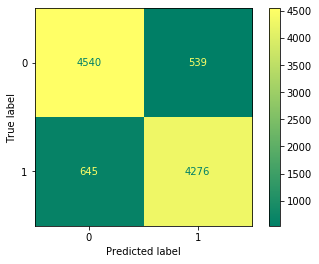

In [120]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mnb, xt_vec, y_test, cmap = plt.cm.summer)
plt.show()

In [121]:
from sklearn.metrics import classification_report
k = classification_report(y_test, y_pred)
print(k)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      5079
           1       0.89      0.87      0.88      4921

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Precision-Recall Curve

In [94]:
# gathering Precision/recall scores for different thresholds
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test, predicted_proba[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((8844,), (8844,), (8843,))

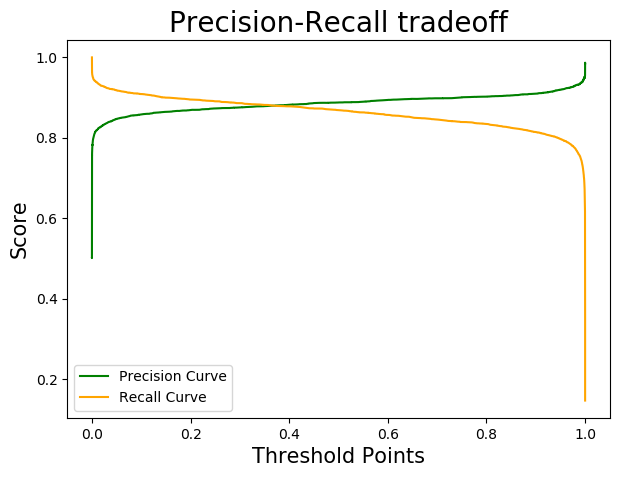

In [96]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( threshold_points, precision_points[:-1], color = 'green', label = 'Precision Curve')
plt.plot( threshold_points, recall_points[:-1], color = 'orange', label = 'Recall Curve')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.title('Precision-Recall tradeoff', fontsize = 20)
plt.legend()
plt.show()

## AUC-ROC Curve

In [97]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predicted_proba[:,1])

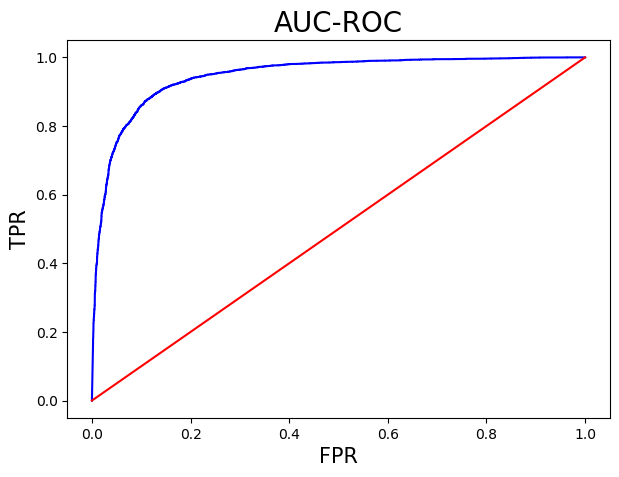

Area Under ROC score is 0.9467331824716722


In [124]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( fpr, tpr, color = 'blue')
plt.plot( [0,1], [0,1], label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
print("Area Under ROC score is " + str(roc_auc_score(y_test, predicted_proba[:,1])))